<a href="https://colab.research.google.com/github/amirnugroho/UAS_DeepLearning/blob/main/1_Combined_EDA_(NASA_FIRMS_MODIS)_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# --- PERUBAHAN DI SINI ---
# Tentukan path langsung ke file yang Anda unggah
file_path = '/content/modis_2024_Indonesia.csv'

# Ekstrak nama file dari path
file_name = file_path.split('/')[-1]

# Baca file CSV
df = pd.read_csv(file_path)

# Pembersihan data (sesuaikan jika perlu)
df = df.drop_duplicates()  # Hapus baris duplikat
df = df.ffill()            # Isi nilai yang hilang
df = df.dropna()           # Hapus sisa NaN

# Menampilkan ringkasan EDA untuk file Anda
print(f"EDA for {file_name}:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Missing Values Check: {df.isnull().sum().to_dict()}")
print("\nSummary Statistics:")
print(df.describe())
print("\n" + "-" * 50 + "\n")

EDA for modis_2024_Indonesia.csv:
Shape: (23542, 15)
Columns: ['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date', 'acq_time', 'satellite', 'instrument', 'confidence', 'version', 'bright_t31', 'frp', 'daynight', 'type']
Missing Values Check: {'latitude': 0, 'longitude': 0, 'brightness': 0, 'scan': 0, 'track': 0, 'acq_date': 0, 'acq_time': 0, 'satellite': 0, 'instrument': 0, 'confidence': 0, 'version': 0, 'bright_t31': 0, 'frp': 0, 'daynight': 0, 'type': 0}

Summary Statistics:
           latitude     longitude   brightness          scan         track  \
count  23542.000000  23542.000000  23542.00000  23542.000000  23542.000000   
mean      -2.903840    114.158531    319.23814      1.416626      1.148976   
std        3.740767      9.047035     11.43915      0.639413      0.205317   
min      -10.836400     95.410400    300.00000      1.000000      1.000000   
25%       -6.932275    108.387075    312.60000      1.000000      1.000000   
50%       -2.117950    112.807750 

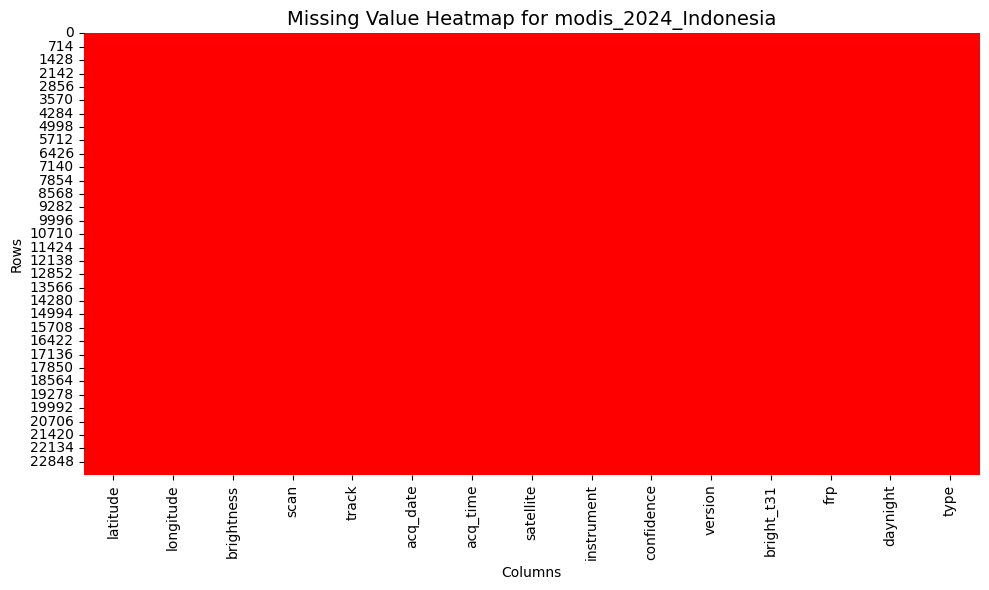

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Karena data sudah dibersihkan dengan df.dropna(), heatmap ini mungkin tidak menunjukkan nilai hilang.
# Kode ini dijalankan pada DataFrame *sebelum* pembersihan untuk melihat missing values awal.
df_original = pd.read_csv(file_path) # Baca lagi file asli untuk visualisasi
file_name_clean = file_name.split('.')[0]

plt.figure(figsize=(10, 6))
sns.heatmap(df_original.isnull(), cbar=False, cmap='autumn')
plt.title(f"Missing Value Heatmap for {file_name_clean}", fontsize=14)
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.savefig(f"missing_heatmap_{file_name_clean}.png")
plt.show()

/tmp/ipython-input-2916508.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


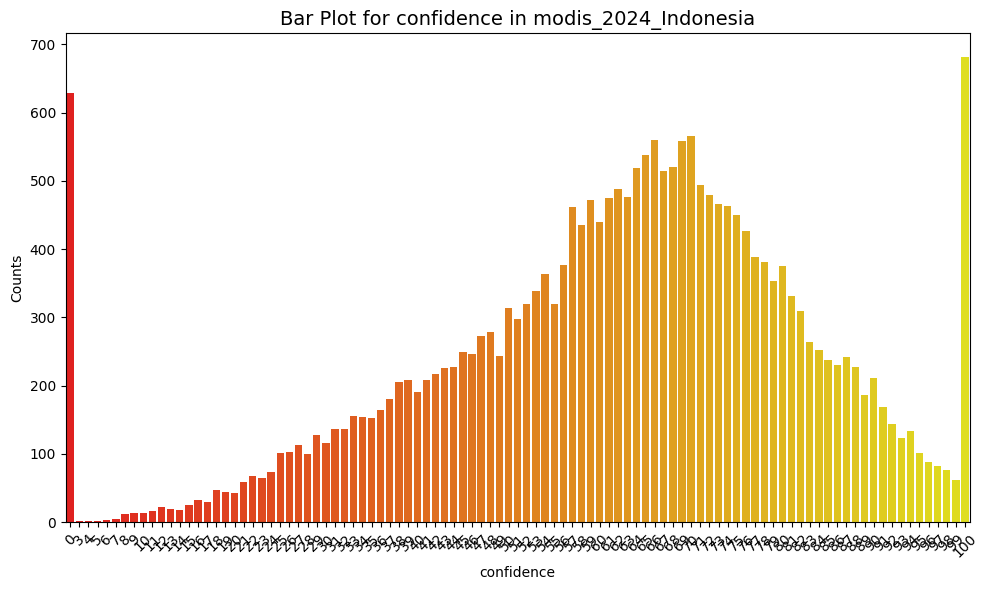

In [ ]:
# Ganti 'confidence' dengan nama kolom yang relevan dari file Anda
kolom_kategorikal = 'confidence'
file_name_clean = file_name.split('.')[0]

if kolom_kategorikal in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=df[kolom_kategorikal].value_counts().index,
        y=df[kolom_kategorikal].value_counts().values,
        palette='autumn'
    )
    plt.title(f"Bar Plot for {kolom_kategorikal} in {file_name_clean}", fontsize=14)
    plt.xlabel(kolom_kategorikal)
    plt.ylabel("Counts")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"bar_plot_{kolom_kategorikal}_{file_name_clean}.png")
    plt.show()
else:
    print(f"Kolom '{kolom_kategorikal}' tidak ditemukan di dalam file.")

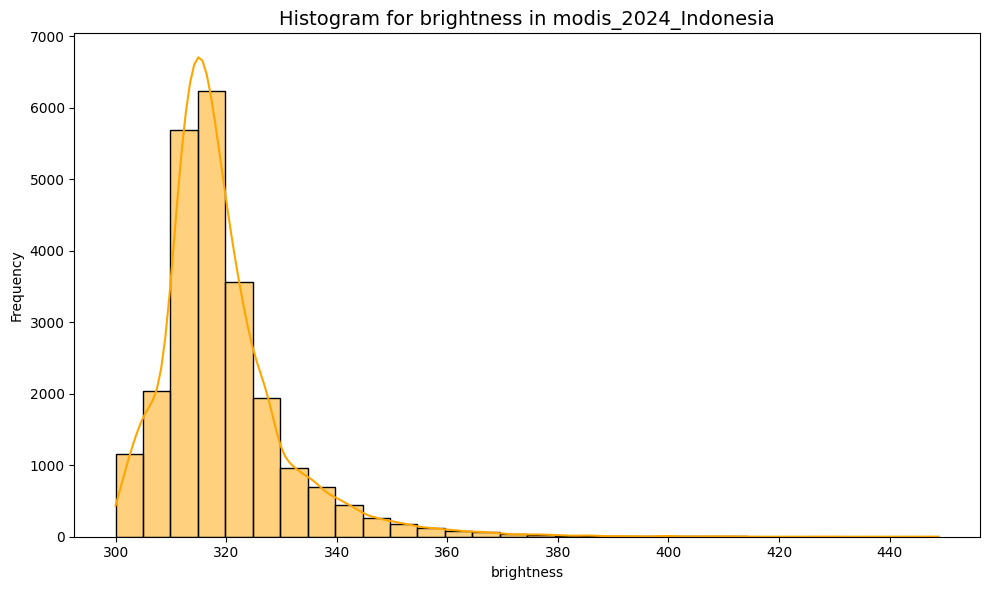

In [ ]:
# Ganti 'brightness' dengan nama kolom yang relevan dari file Anda
kolom_numerik = 'brightness'
file_name_clean = file_name.split('.')[0]

if kolom_numerik in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[kolom_numerik], kde=True, bins=30, color='orange')
    plt.title(f"Histogram for {kolom_numerik} in {file_name_clean}", fontsize=14)
    plt.xlabel(kolom_numerik)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(f"histogram_{kolom_numerik}_{file_name_clean}.png")
    plt.show()
else:
    print(f"Kolom '{kolom_numerik}' tidak ditemukan di dalam file.")